In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = "/content/drive/MyDrive/Data Science Eugene Pinsky/Homework_13/Vicky_Karkera_Assign13/Stock KMeans/data/NVDA_mean_volatility_labels.csv"

df = pd.read_csv(file_path)
df["Year"].value_counts()

2018    53
2019    53
2020    53
2017    52
2021    52
Name: Year, dtype: int64

In [ ]:
#getting year 1 and year 2 data

#getting year 1 and year 2 in stock_data_1 and stock_data_2 respectively
stock_data_1 = df[ df["Year"] == 2020 ]
stock_data_2 = df[ df["Year"] == 2021 ]

#concatenating data for both years
stock_data = pd.concat([stock_data_1,stock_data_2],ignore_index=True)

stock_data.head()

,Year,Week_Number,mean_return,volatility,Label
0,2020,0,0.1790,2.517300,green
1,2020,1,0.6902,0.443671,green
2,2020,2,0.4174,1.923896,green
3,2020,3,0.1240,1.014732,red
4,2020,4,-1.1110,3.027821,red


In [ ]:
stock_data["Year"].value_counts()

2020    53
2021    52
Name: Year, dtype: int64

##Q1.

In [ ]:
#training on year 1 mean return and volatility
kmeans = KMeans(n_clusters=3,random_state = 5).fit(stock_data[["mean_return","volatility"]])

#predicting cluster membership for different weeks based on year 2 mean_return and volatility
kmeans.predict(stock_data[["mean_return","volatility"]])

#printing cluster centers for all clusters
kmeans.cluster_centers_

array([[ 0.153776  ,  4.80408263],
       [ 0.50905769,  2.04156561],
       [-2.0727    , 10.58261889]])

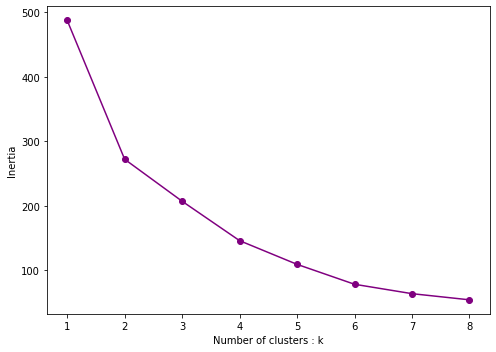

In [ ]:
# list storing values from 1 to 8 for k
k_list =[*range(1,9,1)]
inertia_list = []

for k in k_list:

  #training on year 1 mean return and volatility
  kmeans = KMeans(n_clusters=k,random_state = 5).fit(stock_data[["mean_return","volatility"]])

  #predicting cluster membership for different weeks based on year 2 mean_return and volatility
  kmeans.predict(stock_data[["mean_return","volatility"]])

  #storing inertia for different values of k
  inertia_list.append(kmeans.inertia_)

fig,ax = plt.subplots(1,figsize=(7,5))
plt.plot(k_list,inertia_list,marker='o',color='purple')
plt.xlabel("Number of clusters : k")
plt.ylabel("Inertia")
plt.tight_layout()
plt.show()

##Q2.

In [ ]:
#training on year 1 mean return and volatility
kmeans = KMeans(n_clusters=4,random_state = 5).fit(stock_data[["mean_return","volatility"]])

#predicting cluster membership for different weeks based on year 2 mean_return and volatility
y_kmeans = kmeans.predict(stock_data[["mean_return","volatility"]])

#printing cluster centers for all clusters
centroids = kmeans.cluster_centers_

In [ ]:
centroids

array([[ 0.39554921,  1.82679092],
       [-0.67244167,  4.33058541],
       [ 2.17311875,  3.77014408],
       [-2.0727    , 10.58261889]])

In [ ]:
y_kmeans

array([0, 0, 0, 0, 1, 0, 2, 1, 1, 1, 3, 3, 2, 1, 2, 2, 1, 0, 0, 2, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 1,
       2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 1, 1, 0, 0, 0,
       0, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 2, 1, 1, 1, 1, 0, 0], dtype=int32)

In [ ]:
#concatenating cluster predictions as a column to stock data
stock_data_clusters = pd.concat([stock_data,pd.DataFrame(y_kmeans)],axis=1)
stock_data_clusters.rename(columns={0:"Cluster label"},inplace=True)
stock_data_clusters

,Year,Week_Number,mean_return,volatility,Label,Cluster label
0,2020,0,0.17900,2.517300,green,0
1,2020,1,0.69020,0.443671,green,0
2,2020,2,0.41740,1.923896,green,0
3,2020,3,0.12400,1.014732,red,0
4,2020,4,-1.11100,3.027821,red,1
...,...,...,...,...,...,...
100,2021,48,-0.44020,4.411266,red,1
101,2021,49,-0.23780,4.732136,red,1
102,2021,50,-1.49980,5.942426,red,1
103,2021,51,1.63275,2.256175,red,0


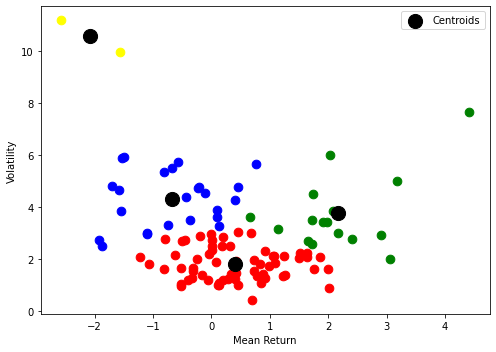

In [ ]:
#plotting clusters and their centroids
fig, ax = plt.subplots(1,figsize=(7,5)) 

plt.scatter(stock_data_clusters[stock_data_clusters["Cluster label"]==0]["mean_return"],stock_data_clusters[stock_data_clusters["Cluster label"]==0]["volatility"],s = 75, c = 'red') 
plt.scatter(stock_data_clusters[stock_data_clusters["Cluster label"]==1]["mean_return"],stock_data_clusters[stock_data_clusters["Cluster label"]==1]["volatility"],s = 75, c = 'blue') 
plt.scatter(stock_data_clusters[stock_data_clusters["Cluster label"]==2]["mean_return"],stock_data_clusters[stock_data_clusters["Cluster label"]==2]["volatility"],s = 75, c = 'green') 
plt.scatter(stock_data_clusters[stock_data_clusters["Cluster label"]==3]["mean_return"],stock_data_clusters[stock_data_clusters["Cluster label"]==3]["volatility"],s = 75, c = 'yellow')

plt.scatter(centroids[0,0],centroids[0,1], s = 200, c = 'black', label = 'Centroids')
plt.scatter(centroids[1,0] ,centroids[1,1], s = 200, c = 'black')
plt.scatter(centroids[2,0],centroids[2,1], s = 200, c = 'black')
plt.scatter(centroids[3,0],centroids[3,1] , s = 200, c = 'black') 

x_label = "Mean Return"
y_label = "Volatility"
plt.legend()
plt.xlabel(x_label) 
plt.ylabel(y_label) 
plt.tight_layout() 
plt.show()

Percentage of Red vs Green Weeks : Cluster 0

In [ ]:
round(stock_data_clusters[stock_data_clusters["Cluster label"]==0]["Label"].value_counts(normalize=True)*100,2)

green    53.97
red      46.03
Name: Label, dtype: float64

Percentage of Red vs Green Weeks : Cluster 1

In [ ]:
round(stock_data_clusters[stock_data_clusters["Cluster label"]==1]["Label"].value_counts(normalize=True)*100,2)

red      83.33
green    16.67
Name: Label, dtype: float64

Percentage of Red vs Green Weeks : Cluster 2

In [ ]:
round(stock_data_clusters[stock_data_clusters["Cluster label"]==2]["Label"].value_counts(normalize=True)*100,2)

green    75.0
red      25.0
Name: Label, dtype: float64

Percentage of Red vs Green Weeks : Cluster 3

In [ ]:
round(stock_data_clusters[stock_data_clusters["Cluster label"]==3]["Label"].value_counts(normalize=True)*100,2)

red    100.0
Name: Label, dtype: float64